# LGM Intern

# khushi Udasi

# Task-4 (Advanced level task)

# Topic:- Next Word Prediction

# Using Tensorflow and Keras library train a RNN, to predict the next word. Dataset Link: https://drive.google.com/file/d/1GeUzNVqiixXHnTl8oNiQ2W3CynX_lsu2/view

# Importing libraries

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import random
import sys

# Loading dataset 

In [2]:
filename = "1661-0.txt"
raw_text = open(filename, 'r', encoding='utf-8').read()
raw_text = raw_text.lower()
print(raw_text[0:1000])

﻿
project gutenberg's the adventures of sherlock holmes, by arthur conan doyle

this ebook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  you may copy it, give it away or
re-use it under the terms of the project gutenberg license included
with this ebook or online at www.gutenberg.net


title: the adventures of sherlock holmes

author: arthur conan doyle

release date: november 29, 2002 [ebook #1661]
last updated: may 20, 2019

language: english

character set encoding: utf-8

*** start of this project gutenberg ebook the adventures of sherlock holmes ***



produced by an anonymous project gutenberg volunteer and jose menendez



cover



the adventures of sherlock holmes



by arthur conan doyle



contents


   i.     a scandal in bohemia
   ii.    the red-headed league
   iii.   a case of identity
   iv.    the boscombe valley mystery
   v.     the five orange pips
   vi.    the man with the twisted lip
   vii.   the adventure of the blue 

# remove numbers

In [3]:
raw_text = ''.join(c for c in raw_text if not c.isdigit())

In [4]:
chars = sorted(list(set(raw_text))) #List of every character

In [5]:
char_to_int = dict((c, i) for i, c in enumerate(chars))#Create a dictionary of characters mapped to integer values

In [6]:
int_to_char = dict((i, c) for i, c in enumerate(chars)) #Do the reverse so we can print our predictions in characters and not integers

# summarize the data

In [7]:
n_chars = len(raw_text)
n_vocab = len(chars)
print("Total Characters in the text; corpus length: ", n_chars)
print("Total Vocab: ", n_vocab)

Total Characters in the text; corpus length:  581397
Total Vocab:  63


# create input/output sequences for training

In [8]:
seq_length = 60  #Length of each input sequence
step = 10   #Instead of moving 1 letter at a time, try skipping a few. 
sentences = []    # X values (Sentences)
next_chars = []   # Y values. The character that follows the sentence defined as X
for i in range(0, n_chars - seq_length, step):  #step=1 means each sentence is offset just by a single letter
    sentences.append(raw_text[i: i + seq_length])  #Sequence in
    next_chars.append(raw_text[i + seq_length])  #Sequence out
n_patterns = len(sentences)    
print('Number of sequences:', n_patterns)

Number of sequences: 58134


In [9]:
x = np.zeros((len(sentences), seq_length, n_vocab), dtype=np.bool)
y = np.zeros((len(sentences), n_vocab), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_to_int[char]] = 1
    y[i, char_to_int[next_chars[i]]] = 1
    
print(x.shape)
print(y.shape)

print(y[0:10])

(58134, 60, 63)
(58134, 63)
[[False False False False False False False False False False False False
  False False False False False False False False False False False  True
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False False False  True
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False Fals

# Build the model: a single LSTM

In [10]:
model = Sequential()
model.add(LSTM(128, input_shape=(seq_length, n_vocab)))
model.add(Dense(n_vocab, activation='softmax'))

optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               98304     
_________________________________________________________________
dense (Dense)                (None, 63)                8127      
Total params: 106,431
Trainable params: 106,431
Non-trainable params: 0
_________________________________________________________________


C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


# define the checkpoint

In [11]:
from keras.callbacks import ModelCheckpoint

filepath="saved_weights/saved_weights-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')

callbacks_list = [checkpoint]


# Fit the model

history = model.fit(x, y,
          batch_size=128,
          epochs=3,   
          callbacks=callbacks_list)

model.save('my_dataset_3epochs.h5')

Epoch 1/3
455/455 [==============================] - 170s 367ms/step - loss: 2.2900

Epoch 00001: loss improved from inf to 2.29005, saving model to saved_weights\saved_weights-01-2.2900.hdf5
Epoch 2/3
455/455 [==============================] - 161s 353ms/step - loss: 1.8611

Epoch 00002: loss improved from 2.29005 to 1.86107, saving model to saved_weights\saved_weights-02-1.8611.hdf5
Epoch 3/3
455/455 [==============================] - 139s 306ms/step - loss: 1.7039

Epoch 00003: loss improved from 1.86107 to 1.70387, saving model to saved_weights\saved_weights-03-1.7039.hdf5


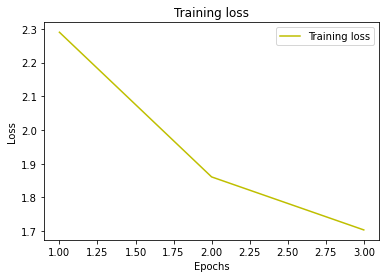

In [12]:

from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch


loss = history.history['loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Writing our own softmax function

In [13]:

def sample(preds):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds) #exp of log (x), isn't this same as x??
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1) 
    return np.argmax(probas)

# load the network weights

In [14]:
filename = "my_dataset_3epochs.h5"
model.load_weights(filename)

# Pick a random sentence from the text as seed.

In [15]:
#Pick a random sentence from the text as seed.
start_index = random.randint(0, n_chars - seq_length - 1)

In [16]:
generated = ''
sentence = raw_text[start_index: start_index + seq_length]
generated += sentence

print('----- Seed for our text prediction: "' + sentence + '"')

----- Seed for our text prediction: "ttempting to put colour and
life into each of your statement"


In [ ]:

for i in range(400):   # Number of characters including spaces
    x_pred = np.zeros((1, seq_length, n_vocab))
    for t, char in enumerate(sentence):
        x_pred[0, t, char_to_int[char]] = 1.

    preds = model.predict(x_pred, verbose=0)[0]
    next_index = sample(preds)
    next_char = int_to_char[next_index]

    generated += next_char
    sentence = sentence[1:] + next_char

    sys.stdout.write(next_char)
    sys.stdout.flush()
print()

awes the lunding. i have beeninds to bedxen likighterb-stoutakendsos, and wits ducged a ronch presite 